### For Preprocessing NLP Data
- removing non alphabetic character
- Lowering the format
- Tokenization
- Remove stop words
- Steming / Semitization
- Spell Correction
- vectorization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.txt",sep=',')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
columns = ['v1','v2']
df = df[columns]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
df.rename(columns={'v1':'label','v2':'comments'},inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   comments  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,label,comments
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
#extracting spam data
spam_data = df[df.label=='spam']['comments']
spam = ' '.join(list(spam_data))
spam

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

In [9]:
from wordcloud import WordCloud

In [10]:
spam_wc = WordCloud(width=500,height=500).generate(spam)

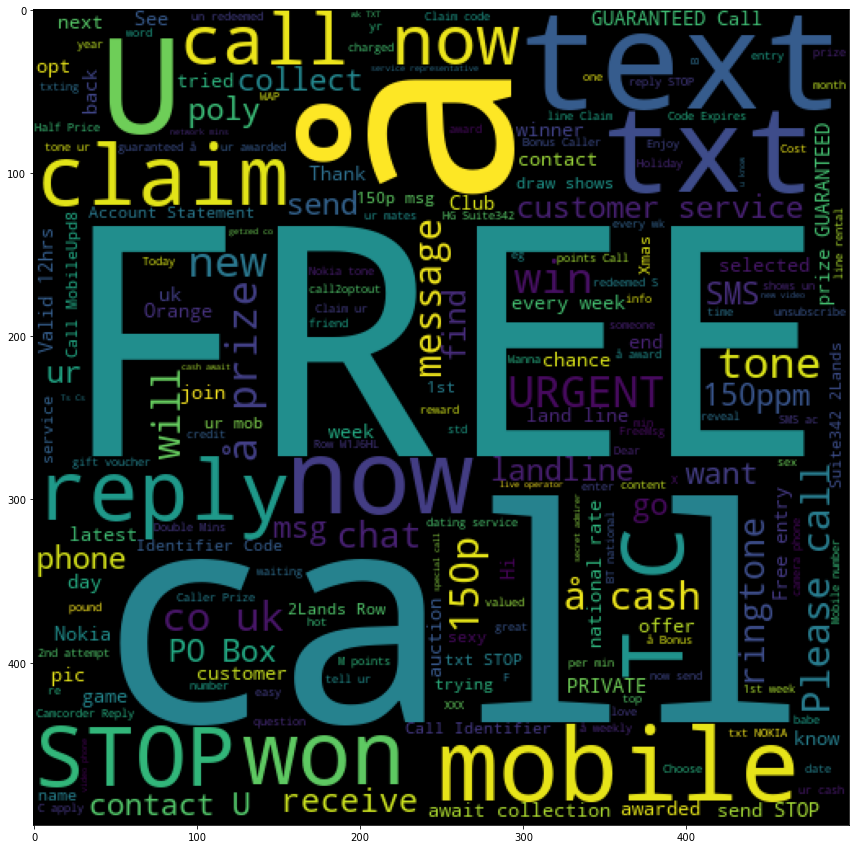

In [11]:
#visualizing spam topics
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)
plt.show()

### Preprocessing the Data

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from autocorrect import Speller

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
spell = Speller()
stemmer = PorterStemmer()

In [15]:
from tqdm import tqdm
import re

In [16]:
data = []
for i in tqdm(range(df.shape[0])):
    lines = df.iloc[i,1]
    
    #removing non alphabetic characters
    lines = re.sub('[^A-Za-z]',' ',lines)
    
    #lowering the every word
    lines = lines.lower()
    
    #tokenization
    tokenized_lines = word_tokenize(lines)
    
    # removing stop words and stemming and spell correction
    processed_lines = []
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
    final_lines = ' '.join(processed_lines)
    data.append(final_lines)
            

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [04:42<00:00, 19.72it/s]


In [17]:
lines

'rofl  its true to its name'

In [18]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [19]:
processed_lines

['roll', 'true', 'name']

In [20]:
data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

# Encoding Labels column

In [21]:
df['encoded_labels'] = df.label.apply(lambda x : 1 if x == 'spam' else 0)

In [22]:
df.head()

,label,comments,encoded_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
from sklearn.model_selection import train_test_split  #for splitting the dataset in train and test set

In [26]:
X = data
y = df['encoded_labels']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [27]:
len(y[y==0])

4825

### Vectorization using Bag of Words

In [28]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_tdf
matrix = CountVectorizer()

In [41]:
X_train_vect = matrix.fit_transform(X_train).toarray()
X_test_vect = matrix.transform(X_test).toarray()

In [42]:
len(X_train_vect)

4179

## training the model

In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [44]:
model.fit(X_train_vect,y_train)

GaussianNB()

In [45]:
model.class_count_

array([3624.,  555.])

In [46]:
model.classes_

array([0, 1], dtype=int64)

In [47]:
y_train.value_counts()

0    3624
1     555
Name: encoded_labels, dtype: int64

In [51]:
prediction = model.predict(X_test_vect)

In [52]:
X_train_vect.shape

(4179, 4514)

In [53]:
X_test_vect.shape

(1393, 4514)

In [54]:
prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
y_test

4635    0
2279    0
4545    0
5084    0
5298    0
       ..
1735    0
3745    0
96      0
510     0
2830    0
Name: encoded_labels, Length: 1393, dtype: int64

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
accuracy_score(y_test,prediction)

0.8542713567839196

In [63]:
confusion = confusion_matrix(y_test,prediction)

In [64]:
confusion

array([[1020,  181],
       [  22,  170]], dtype=int64)

In [60]:
(1020+170)/(1020+22+181+170)

0.8542713567839196

In [65]:
confusion_matrix(prediction,y_test)

array([[1020,   22],
       [ 181,  170]], dtype=int64)

In [69]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>